In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yelizovo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | kohlu
Processing Record 5 of Set 1 | beyneu
Processing Record 6 of Set 1 | mezhdurechensk
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | yulara
Processing Record 11 of Set 1 | tecoanapa
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | kati
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | stillwater
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tabou
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | nassau
Proces

Processing Record 38 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | lusambo
Processing Record 41 of Set 4 | luanda
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | oranjemund
Processing Record 44 of Set 4 | batemans bay
Processing Record 45 of Set 4 | gizo
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | nguiu
City not found. Skipping...
Processing Record 48 of Set 4 | zhanatas
City not found. Skipping...
Processing Record 49 of Set 4 | zapotiltic
Processing Record 50 of Set 4 | werda
Processing Record 1 of Set 5 | paris
Processing Record 2 of Set 5 | erenhot
Processing Record 3 of Set 5 | phibun mangsahan
Processing Record 4 of Set 5 | asau
Processing Record 5 of Set 5 | shchelyayur
City not found. Skipping...
Processing Record 6 of Set 5 | tlacotepec
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | paamiut
Processing Record 9 of Set 5 | winslow
Processing Record 10 of

Processing Record 28 of Set 8 | atbasar
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | malwan
City not found. Skipping...
Processing Record 31 of Set 8 | harnosand
Processing Record 32 of Set 8 | santarem
Processing Record 33 of Set 8 | dobryanka
Processing Record 34 of Set 8 | chaplygin
Processing Record 35 of Set 8 | louis trichardt
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | haimen
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | nola
Processing Record 42 of Set 8 | calatrava
Processing Record 43 of Set 8 | meulaboh
Processing Record 44 of Set 8 | aasiaat
Processing Record 45 of Set 8 | tshela
Processing Record 46 of Set 8 | charagua
Processing Record 47 of Set 8 | kutulik
Processing Record 48 of Set 8 | ambilobe
Processing Record 49 of Set 8 | cabedelo
Processing Record 50 of Set 8 | bandarbe

Processing Record 15 of Set 12 | sembakung
Processing Record 16 of Set 12 | waddan
Processing Record 17 of Set 12 | tabas
Processing Record 18 of Set 12 | marquette
Processing Record 19 of Set 12 | viedma
Processing Record 20 of Set 12 | kenai
Processing Record 21 of Set 12 | karpathos
Processing Record 22 of Set 12 | eyl
Processing Record 23 of Set 12 | ivanava
Processing Record 24 of Set 12 | tazovskiy
Processing Record 25 of Set 12 | chardara
Processing Record 26 of Set 12 | ballina
Processing Record 27 of Set 12 | christchurch
Processing Record 28 of Set 12 | lentekhi
Processing Record 29 of Set 12 | gunjur
Processing Record 30 of Set 12 | san carlos de bariloche
Processing Record 31 of Set 12 | quthing
Processing Record 32 of Set 12 | pando
Processing Record 33 of Set 12 | calama
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 12 | pecsvarad
Processing Record 36 of Set 12 | sydney
Processing Record 37 of Set 12 | karratha
Processing Record 38 of Set 12 | lakse

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yelizovo,53.1873,158.3805,62.74,93,100,7.00,RU,2022-07-12 22:47:43
1,Albany,42.6001,-73.9662,84.02,63,21,1.99,US,2022-07-12 22:42:51
2,Nanortalik,60.1432,-45.2371,42.66,88,25,9.46,GL,2022-07-12 22:47:44
3,Kohlu,29.8962,69.2520,81.46,65,38,5.21,PK,2022-07-12 22:44:27
4,Beyneu,45.3167,55.2000,85.19,32,0,8.12,KZ,2022-07-12 22:43:52
5,Mezhdurechensk,53.6942,88.0603,51.71,93,17,2.59,RU,2022-07-12 22:47:44
6,Sao Joao Da Barra,-21.6403,-41.0511,73.04,83,87,20.27,BR,2022-07-12 22:47:45
7,Carnarvon,-24.8667,113.6333,65.32,70,0,6.46,AU,2022-07-12 22:43:51
8,Yulara,-25.2406,130.9889,44.31,69,0,8.41,AU,2022-07-12 22:47:46
9,Tecoanapa,16.5167,-98.7500,86.11,71,36,11.16,MX,2022-07-12 22:47:46


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yelizovo,RU,2022-07-12 22:47:43,53.1873,158.3805,62.74,93,100,7.00
1,Albany,US,2022-07-12 22:42:51,42.6001,-73.9662,84.02,63,21,1.99
2,Nanortalik,GL,2022-07-12 22:47:44,60.1432,-45.2371,42.66,88,25,9.46
3,Kohlu,PK,2022-07-12 22:44:27,29.8962,69.2520,81.46,65,38,5.21
4,Beyneu,KZ,2022-07-12 22:43:52,45.3167,55.2000,85.19,32,0,8.12
5,Mezhdurechensk,RU,2022-07-12 22:47:44,53.6942,88.0603,51.71,93,17,2.59
6,Sao Joao Da Barra,BR,2022-07-12 22:47:45,-21.6403,-41.0511,73.04,83,87,20.27
7,Carnarvon,AU,2022-07-12 22:43:51,-24.8667,113.6333,65.32,70,0,6.46
8,Yulara,AU,2022-07-12 22:47:46,-25.2406,130.9889,44.31,69,0,8.41
9,Tecoanapa,MX,2022-07-12 22:47:46,16.5167,-98.7500,86.11,71,36,11.16


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

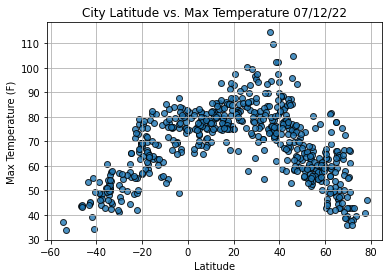

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

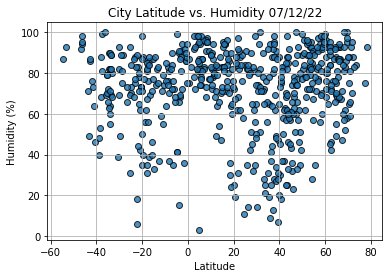

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

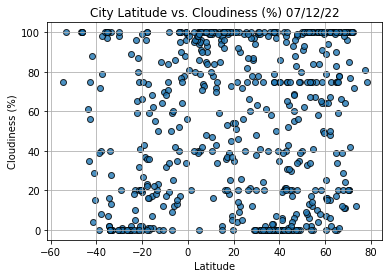

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

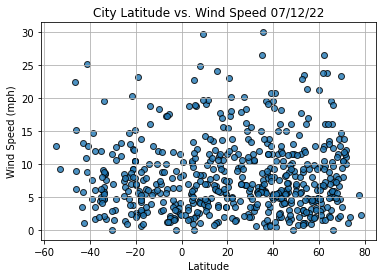

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Kati
Country                        ML
Date          2022-07-12 22:47:48
Lat                       12.7441
Lng                       -8.0726
Max Temp                    80.01
Humidity                       64
Cloudiness                     34
Wind Speed                   4.88
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
572     True
573     True
574    False
575     True
576    False
Name: Lat, Length: 577, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yelizovo,RU,2022-07-12 22:47:43,53.1873,158.3805,62.74,93,100,7.00
1,Albany,US,2022-07-12 22:42:51,42.6001,-73.9662,84.02,63,21,1.99
2,Nanortalik,GL,2022-07-12 22:47:44,60.1432,-45.2371,42.66,88,25,9.46
3,Kohlu,PK,2022-07-12 22:44:27,29.8962,69.2520,81.46,65,38,5.21
4,Beyneu,KZ,2022-07-12 22:43:52,45.3167,55.2000,85.19,32,0,8.12
...,...,...,...,...,...,...,...,...,...
570,Arlit,NE,2022-07-12 23:03:29,18.7369,7.3853,93.87,24,45,6.22
571,Okhotsk,RU,2022-07-12 23:03:30,59.3833,143.3000,59.07,95,100,9.24
572,Gua Musang,MY,2022-07-12 23:03:30,4.8823,101.9644,70.32,95,99,0.96
573,Ukiah,US,2022-07-12 23:02:22,39.1502,-123.2078,97.43,31,0,12.66


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yelizovo,RU,2022-07-12 22:47:43,53.1873,158.3805,62.74,93,100,7.00
1,Albany,US,2022-07-12 22:42:51,42.6001,-73.9662,84.02,63,21,1.99
2,Nanortalik,GL,2022-07-12 22:47:44,60.1432,-45.2371,42.66,88,25,9.46
3,Kohlu,PK,2022-07-12 22:44:27,29.8962,69.2520,81.46,65,38,5.21
4,Beyneu,KZ,2022-07-12 22:43:52,45.3167,55.2000,85.19,32,0,8.12


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

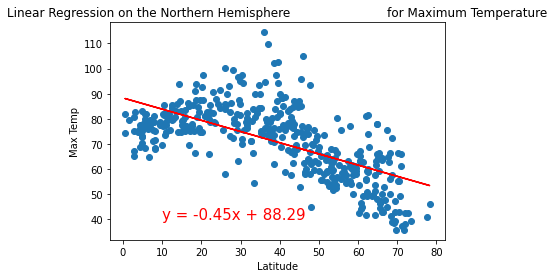

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

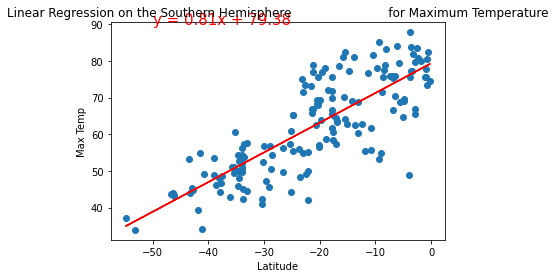

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

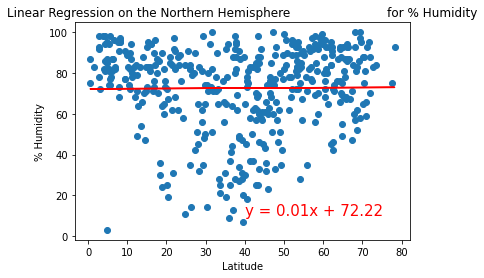

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

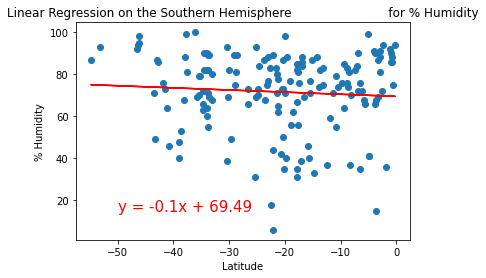

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                    for % Cloudiness', '% Cloudiness',(10,55))

SyntaxError: EOL while scanning string literal (3761569259.py, line 6)

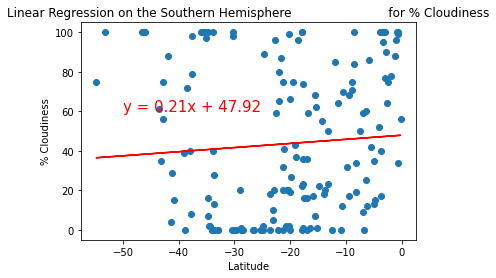

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

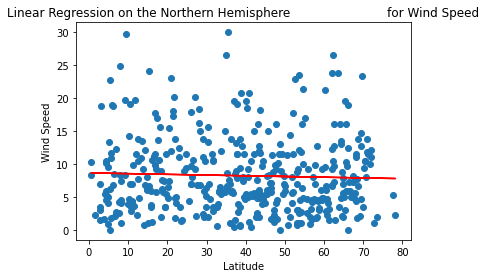

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

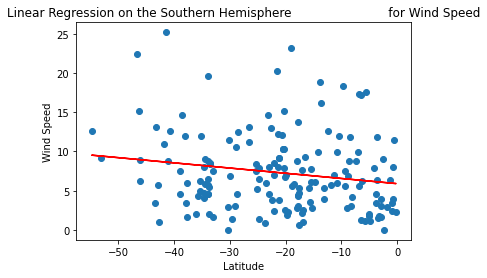

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))